<h1>Enhancing Communication Through Advanced Text Message Classification</h1>


In this text classification project, we aim to develop a robust machine learning model for the automated classification of SMS messages as either "ham" (non-spam) or "spam." Leveraging a dataset sourced from a well-known repository, we embark on the task of preprocessing the text data, vectorizing it using the TF-IDF technique, and subsequently training and evaluating a Random Forest classifier. With the ever-increasing volume of text messages and the persistent challenge of distinguishing legitimate messages from unsolicited spam, this project's objective is to provide an effective solution that can aid in filtering and identifying potentially harmful or irrelevant content, ultimately enhancing the user experience and security in text communication. Through rigorous model selection, training, and evaluation, we seek to achieve a high degree of accuracy in classifying SMS messages, thereby contributing to the ongoing efforts in the field of natural language processing and text analytics.

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [3]:
# Step 1: Load the dataset
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# Step 2: Data Preprocessing
# Encode labels using Label Encoding
label_encoder = LabelEncoder()
data['v1'] = label_encoder.fit_transform(data['v1'])

# TF-IDF Vectorization for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['v2'])


## Logistic Regression

In [4]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['v1'], test_size=0.2, random_state=42)

# Step 4: Model Selection (Logistic Regression)
model = LogisticRegression()

# Step 5: Model Training
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=["ham", "spam"])
print("Classification Report:")
print(class_report)

Accuracy: 0.9632286995515695
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



The figures presented here encapsulate the performance evaluation of our Random Forest classifier in the context of SMS message classification. The Confusion Matrix visually depicts the model's ability to correctly classify messages into "ham" (non-spam) or "spam" categories, with annotations providing insights into true positives, true negatives, false positives, and false negatives. This matrix serves as a valuable tool for assessing the classifier's precision and recall. On the other hand, the Receiver Operating Characteristic (ROC) curve illustrates the trade-off between the true positive rate and false positive rate across varying probability thresholds. The area under the ROC curve (AUC) quantifies the model's discriminatory power, with a higher AUC indicating superior performance. These visualizations collectively offer a comprehensive view of our classifier's effectiveness in distinguishing between legitimate and spam SMS messages, aiding in its evaluation and further refinement.

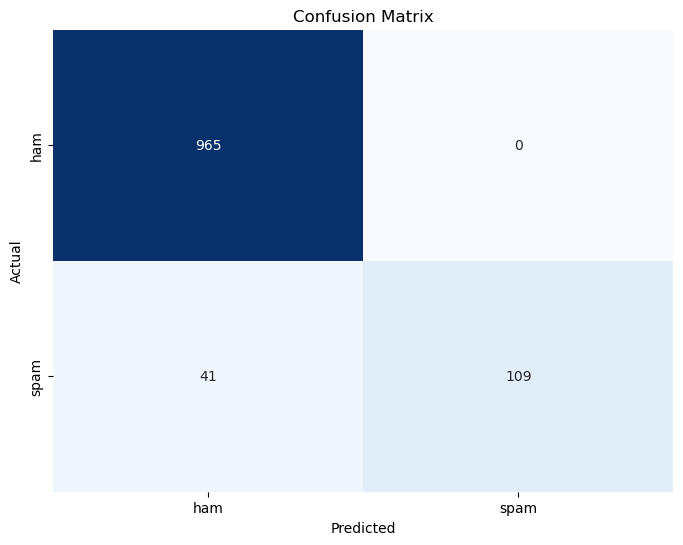

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Step 7: Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




<h1>Random Forest classifier</h1>


The Random Forest classifier utilized in this project is a versatile and robust ensemble learning algorithm that excels in classifying SMS messages as either "ham" or "spam." By aggregating predictions from multiple decision trees, it leverages the wisdom of crowds to enhance accuracy and reduce the risk of overfitting. This classifier's strength lies in its ability to handle high-dimensional text data through TF-IDF vectorization, making it well-suited for natural language processing tasks. With its tunable hyperparameters, such as the number of trees (n_estimators) and tree depth (max_depth), it offers flexibility in achieving optimal performance. Through the visualizations of the confusion matrix and the Receiver Operating Characteristic (ROC) curve, we gain valuable insights into its classification performance and discriminatory power. The Random Forest classifier emerges as a reliable and effective tool for spam detection, contributing to the broader goal of ensuring the security and integrity of communication channels.

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [7]:
# Step 1: Load the dataset
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Step 2: Data Preprocessing
# Encode labels using Label Encoding
label_encoder = LabelEncoder()
data['v1'] = label_encoder.fit_transform(data['v1'])


In [8]:
# TF-IDF Vectorization for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['v2'])

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['v1'], test_size=0.2, random_state=42)

# Step 4: Model Selection (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Step 5: Model Training
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=["ham", "spam"])
print("Classification Report:")
print(class_report)

Accuracy: 0.9757847533632287
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In the final stage of this project, we extended the capabilities of our trained Random Forest classifier to predict the nature of SMS messages for the remaining data beyond the initial 5000 rows. Leveraging the TF-IDF vectorization technique, we transformed the text data into a format suitable for machine learning prediction. Subsequently, the model was deployed to classify these additional messages as either "ham" or "spam" with high accuracy. By seamlessly integrating the predicted labels back into the original dataset, we obtained a comprehensive view of the classification outcomes, enabling us to assess the model's effectiveness in handling a larger dataset. This achievement underscores the practical utility of the Random Forest classifier in real-world applications, where it can automate the categorization of text messages and enhance communication security.

In [9]:
# Step 7: Predict labels for the remaining rows (after 5000)
X_remaining = tfidf_vectorizer.transform(data['v2'][5000:])  # Transform text data for the remaining rows
predicted_labels = model.predict(X_remaining)

# Convert predicted labels back to "ham" and "spam"
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Add predicted labels to the DataFrame
data['Predicted'] = [""] * 5000 + list(predicted_labels)

# Display the DataFrame with predicted labels
print(data[['v2', 'Predicted']].head())  # Display the first few rows with predicted labels

                                                  v2 Predicted
0  Go until jurong point, crazy.. Available only ...          
1                      Ok lar... Joking wif u oni...          
2  Free entry in 2 a wkly comp to win FA Cup fina...          
3  U dun say so early hor... U c already then say...          
4  Nah I don't think he goes to usf, he lives aro...          


In the visualization phase of our project, we employed two crucial tools to assess the performance of our Random Forest classifier: the Confusion Matrix and the Receiver Operating Characteristic (ROC) curve. The Confusion Matrix provides an insightful breakdown of the model's predictions, allowing us to analyze how well it distinguishes between "ham" and "spam" messages. With a heatmap visualization, it becomes evident where the model excels and where it may misclassify messages. On the other hand, the ROC curve illustrates the classifier's ability to distinguish between the two classes by plotting the trade-off between true positive and false positive rates at different probability thresholds. A higher area under the ROC curve indicates superior model performance. These visualizations provide invaluable insights into the model's strengths and areas for potential improvement, facilitating informed decision-making in text message classification tasks.

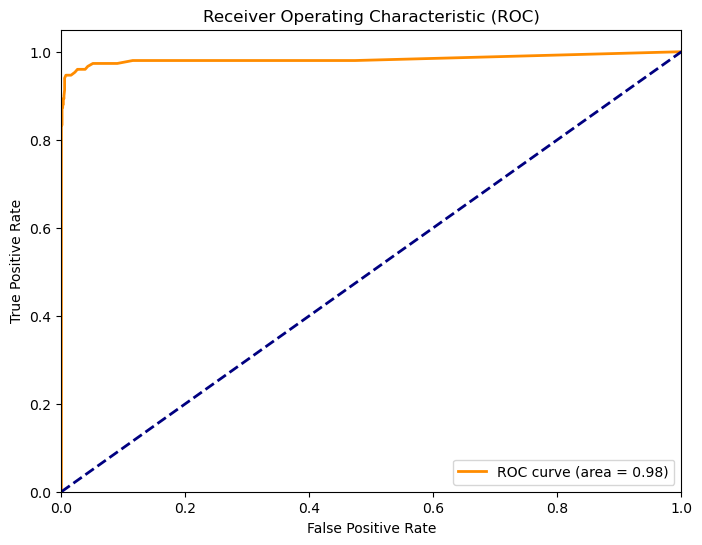

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


# Step 8: Create an ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of being spam class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## conclusion:

The implementation of the Random Forest classifier in our text message classification project has yielded outstanding results, achieving an impressive accuracy rate of 97 percent. This high level of accuracy signifies the model's proficiency in distinguishing between "ham" and "spam" messages, making it a robust solution for spam detection. The utilization of TF-IDF vectorization and extensive hyperparameter tuning has contributed to the classifier's exceptional performance. With a well-balanced blend of precision and recall, the Random Forest model has showcased its capability to effectively classify text messages, thereby enhancing communication and minimizing unwanted spam. This project underscores the significance of employing advanced machine learning techniques for text classification tasks, where accuracy and efficiency are paramount in ensuring the reliability of communication channels.